In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from sklearn.metrics import roc_auc_score
from sklearn import mixture, preprocessing, datasets

from importlib import reload
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import patches

import torch.utils.data as data_utils

import utils.models as models
import utils.plotting as plotting
import utils.dataloaders as dl
import utils.traintest as tt
import utils.adversarial as adv
import utils.eval as ev
import model_params as params
import utils.resnet_orig as resnet
import utils.gmm_helpers as gmm_helpers

import model_paths

In [2]:
device = torch.device('cuda:1')
datasets = ['MNIST', 'FMNIST', 'SVHN', 'CIFAR10', 'CIFAR100']

file_dict = {'MNIST' :'samples_steps200_alpha3.0_restarts10_batches10_batch_size100_MNIST_2019-06-11 07:41:24.005548_MNIST.pth',
             'FMNIST':'samples_steps200_alpha3.0_restarts10_batches10_batch_size100_FMNIST_2019-06-11 08:05:12.188177_FMNIST.pth',
             'SVHN' : 'samples_steps200_alpha3.0_restarts10_batches10_batch_size100_SVHN_2019-06-11 08:06:13.094571_SVHN.pth',
             'CIFAR10':'samples_steps200_alpha3.0_restarts10_batches10_batch_size100_CIFAR10_2019-06-11 08:06:41.329635_CIFAR10.pth',
             'CIFAR100' : 'samples_steps200_alpha3.0_restarts10_batches10_batch_size100_CIFAR100_2019-06-11 08:07:09.095861_CIFAR100.pth'
            }


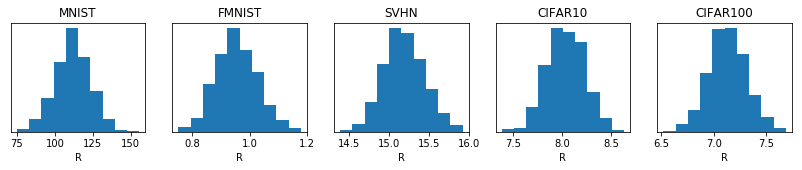

In [3]:
plt.figure(figsize=(14,2))

for i, ds in enumerate(datasets):
    plt.subplot(1, len(datasets), 1 + i)
    
    file = file_dict[ds]

    batch = torch.load('results/backup/' + file)
    plt.title(ds)
    plt.hist(batch.bounds, density=True)
    plt.xlabel('R')
    plt.yticks([])
    
myplot = plt.gcf()

myplot.savefig('results/histograms.eps', format='eps')

In [4]:
myplot.savefig('results/histograms.eps', format='eps', bbox_inches = 'tight',
    pad_inches = 0)